# Kurzbeschreibung des Notebooks
Beschreibung des Notebooks einfügen 

## Modellannahmen
* Parameter 1:  $p_1 = 0,5 \frac{kg}{a}$
* Einwohnerzahl: $E = 82\cdot 10^6$
* ...


# Zunächst die Formatierung (wenn nötig) auf Deutsch umstellen 
(einmal die Zelle ausführen und nachdem die Sitzung abgestürzt ist, nur noch die Zellen unterhalb ausführen)

In [ ]:
import os
# Installiere Deutsche Formatierung, um z.B. Beschriftungen an Plots im deutschen Format auszugeben
!/usr/share/locales/install-language-pack de_DE
!dpkg-reconfigure locales

# Neustart des Notebooks, um die deutsche Formatierung anzuwenden -> Absturz der Sitzung ist hier gewünscht
os.kill(os.getpid(), 9)

/bin/sh: /usr/share/locales/install-language-pack: No such file or directory
/bin/sh: dpkg-reconfigure: command not found


# Pakete installieren

In [4]:
# Essentielle Pakete
import pandas as pd # Zum Einlesen und Verarbeiten der Daten in Dataframes
import numpy as np # Auch zur Datenverarbeitung und für mathematische Operationen
import seaborn as sns # Für einige Plots, die es bei Matplotlib entweder nicht gibt oder die in Seaborn einfacher sind
import matplotlib 
import matplotlib.pyplot as plt # Für Plots
import datetime # Um mit zeitlichen Daten zu arbeiten
import locale # Für die deutsche Formatierung von Dezimaltrennzeichen und Datum etc.
import os # Für Pfade und Ordner, listet z.B. alle Dateien in einem Ordner mit os.listdir("Ordnerpfad")

# Pakete, die sehr nützlich sind
from scipy.stats import linregress # Lineare Regression
import missingno as msno # Prüft ganze Dataframes auf Vollständigkeit und gibt einen visuellen Überblick
import watermark # Paket, das u.A. die Versionen der verwendeten Pakete auslesen kann, wird am Ende verwendet, wenn man das Notebook über Binder teilen möchte

# Parameter einstellen

In [6]:
# Default Plotdesign
blau="#006D72"
rot="#E40033"

#locale.setlocale(locale.LC_ALL, 'german')

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['axes.labelpad'] = 10
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['font.sans-serif'] = 'Arial' # Schriftart
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['legend.framealpha'] = 1
matplotlib.rcParams['figure.figsize']=[16,9]

matplotlib.rcParams['axes.formatter.use_locale'] = True # Auf False ändern für englische Plots (ändert das Trennzeichen)

matplotlib.rcParams['savefig.bbox'] = 'tight'



In [13]:
# Pfade
input_path='data/'
output_path='output/'

In [11]:
# Feste Größen
parameter_1 = 0.5
parameter_2 = 3
einwohner = 82e6

# Daten einlesen

## Datensatz 1
Der 1. Datensatz enthält die globale Durchschnittstemperatur an Land von 1760 bis 2016

In [12]:
T=pd.read_csv(input_path + 'GlobalTemperatures.csv')
T["dt"]=pd.to_datetime(T["dt"])
T_y=T.groupby(pd.Grouper(key='dt', axis=0, 
                      freq='Y')).mean()
T_y.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-12-31,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751-12-31,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752-12-31,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753-12-31,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754-12-31,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


## Datensatz 2
Der 2.Datensatz enthält Daten zur Kohlenstoffmenge in der Atmosphäre von 1960 bis 2018

In [14]:
co=pd.read_csv(input_path + "co2-annmean-mlo.csv")
co["Year"]=pd.to_datetime(co["Year"])
co.head()

,Year,Mean,Uncertainty
0,1959-11-01,315.97,0.12
1,1960-11-01,316.91,0.12
2,1961-11-01,317.64,0.12
3,1962-11-01,318.45,0.12
4,1963-11-01,318.99,0.12


## Auf Vollständigkeit prüfen

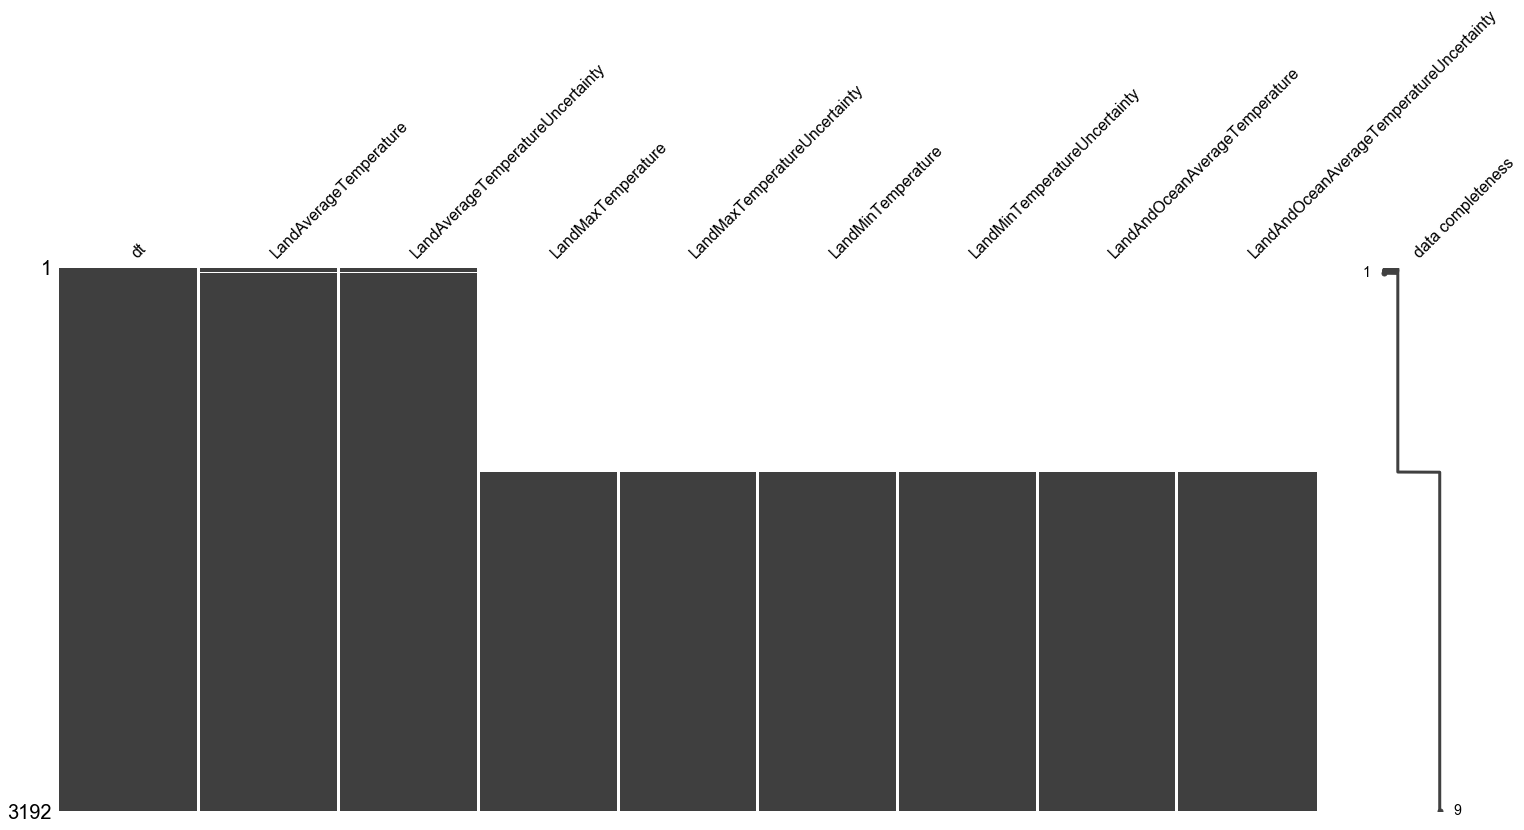

In [15]:
msno.matrix(T, labels=True)

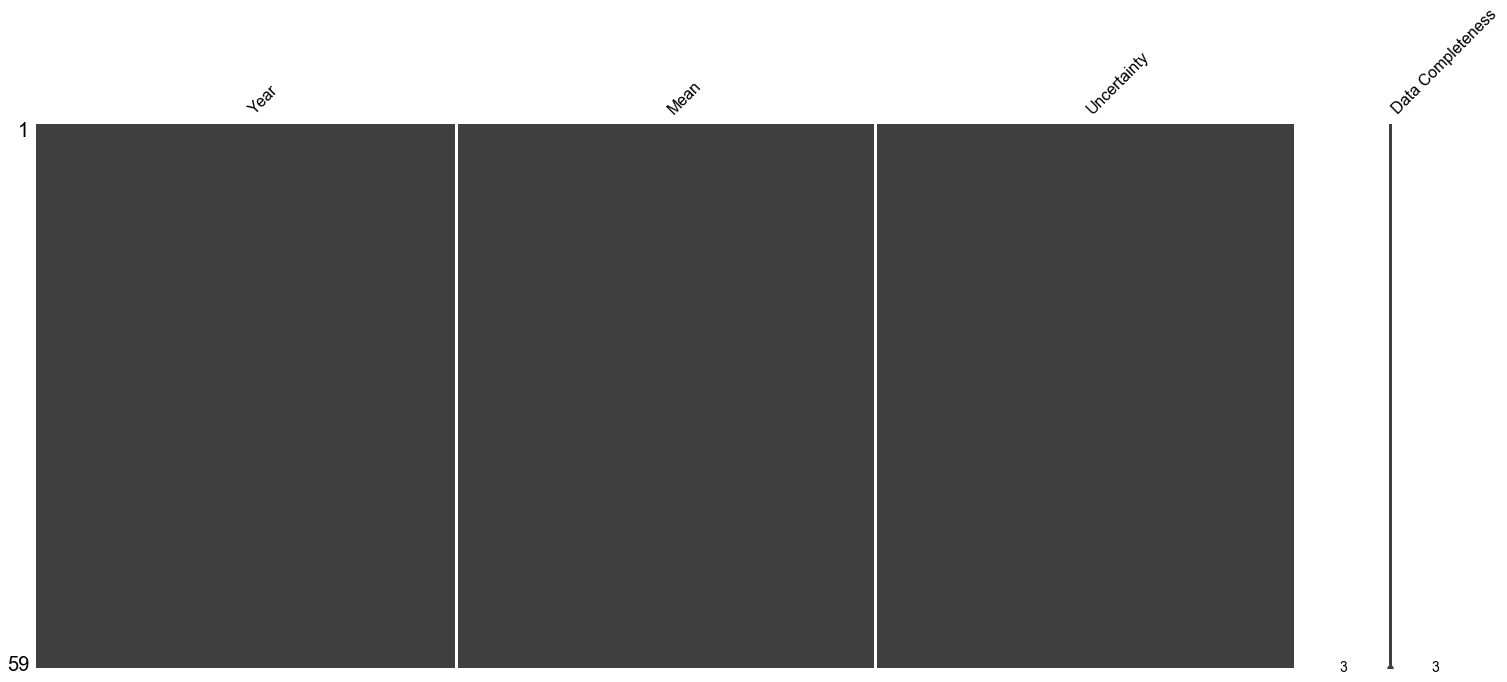

In [16]:
msno.matrix(co, labels=True)

# Nächster Abschnitt

## Einfacher Plot

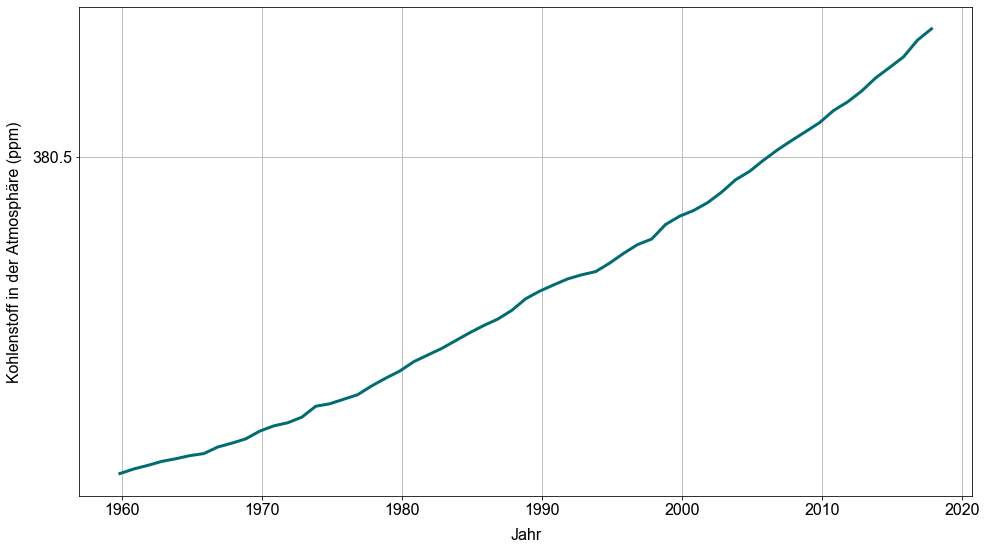

In [25]:
plt.plot(co["Year"],co["Mean"],color=blau)
plt.xlabel("Jahr")
plt.ylabel("Kohlenstoff in der Atmosphäre (ppm)")
plt.yticks(ticks=[380.5])
plt.show()

## Plot mit Fehlerbalken

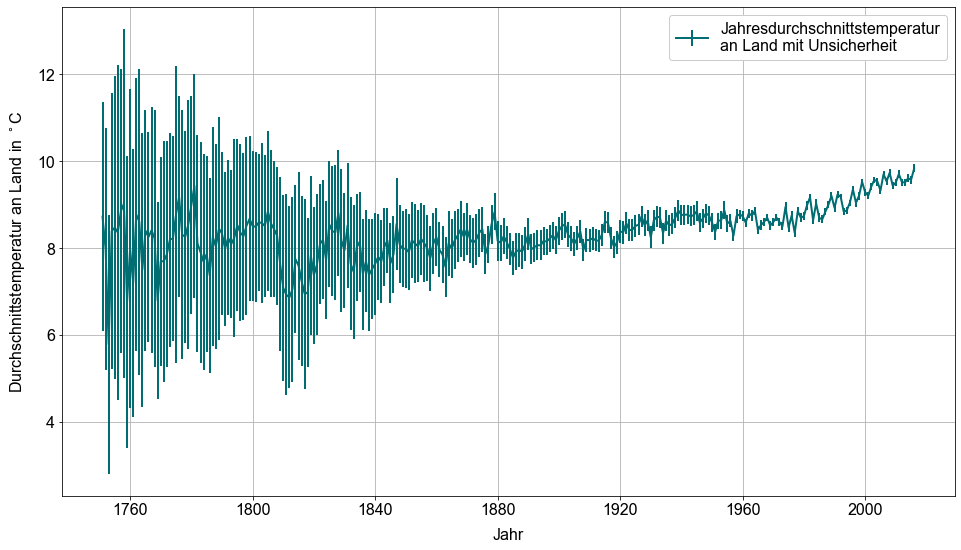

In [19]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
ax.errorbar(T_y.index,T_y["LandAverageTemperature"], T_y["LandAverageTemperatureUncertainty"],lw=2, color=blau, label="Jahresdurchschnittstemperatur\nan Land mit Unsicherheit")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittstemperatur an Land in $^\\circ$C")
plt.legend()
plt.savefig(output_path + "Dateiname.pdf")
plt.show()

## Plot mit zwei y-Achsen

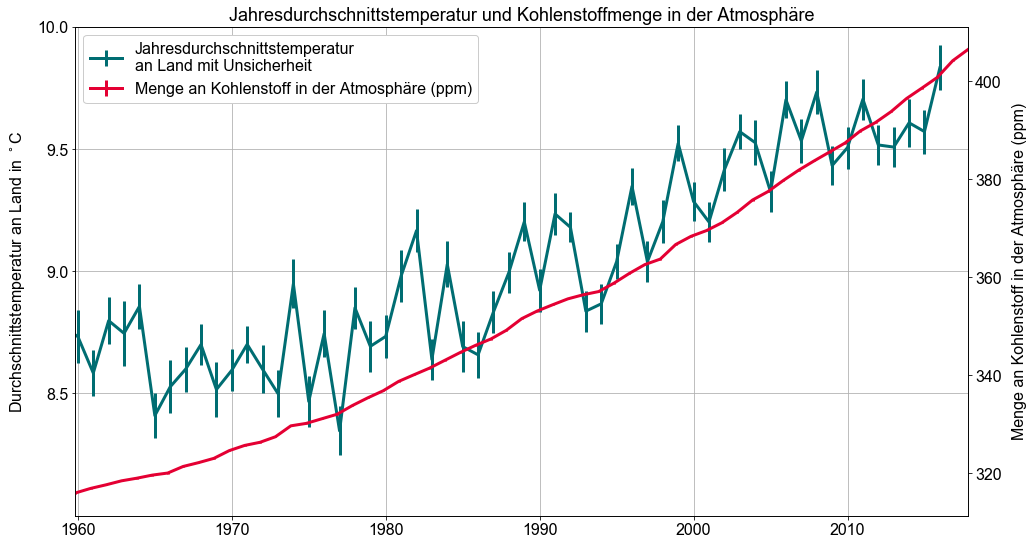

In [20]:
fig,ax=plt.subplots(1,1,sharey=False)
plot1=ax.errorbar(T_y.index,T_y["LandAverageTemperature"], T_y["LandAverageTemperatureUncertainty"],color=blau, label="Jahresdurchschnittstemperatur\nan Land mit Unsicherheit")
ax2 = ax.twinx() # Unabhängige zweite Y-Achse
plot2=ax2.errorbar(co["Year"],co["Mean"],co["Uncertainty"],color=rot, label="Menge an Kohlenstoff in der Atmosphäre (ppm)")
ax2.grid(False) # Doppeltes Grid ausstellen

plt.xlabel("Jahr")
ax.set_ylabel("Durchschnittstemperatur an Land in $^\\circ$C")
ax2.set_ylabel("Menge an Kohlenstoff in der Atmosphäre (ppm)")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.xlim(co["Year"][0],co["Year"][len(co["Year"])-1])
ax.set_ylim(8,10)
ax.set_yticks([8.5,9,9.5,10])

plt.title("Jahresdurchschnittstemperatur und Kohlenstoffmenge in der Atmosphäre")
plt.show()

# Versionen der Pakete ausgeben (Nötig für das Teilen des Notebooks über Binder)
(Den Output in eine Textdatei "requirements.txt" kopieren und die Leerzeichen und den Doppelpunkt zwischen dem Paketnamen und der Version mit == ersetzen. Das Paket google sollte hier gelöscht werden, da es ja nur zum Arbeiten mit Google Colab dient)

In [21]:
%load_ext watermark
%watermark --iversions

pandas    : 1.0.1
numpy     : 1.18.1
watermark : 2.3.0
matplotlib: 3.1.3
seaborn   : 0.10.0
missingno : 0.5.0

